<a href="https://colab.research.google.com/github/AngelitaPrettyciaHarefa/AngelitaPrettyciaHarefa.github.io/blob/main/REAL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRAPING DATA

In [152]:
!pip install -qq google-play-scraper

In [153]:
import json
import pandas as pd

from tqdm import tqdm
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app

In [154]:
from google.colab import drive

drive.mount('/content/gDrive/', force_remount=True)
path = "gDrive/MyDrive/"

Mounted at /content/gDrive/


In [155]:
app_packages = [
    'com.simasmobile.co.id'
]

In [156]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [157]:
app_reviews = []

for ap in tqdm(app_packages):
  rvs, continuation_token = reviews(
      ap,
      lang = 'id',
      country = 'id',
      sort = Sort.MOST_RELEVANT,
      count=1000,
      filter_score_with = None
      )
  app_reviews.extend(rvs)

print_json(app_reviews[0])

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

{
  "appVersion": "3.0234",
  "at": "2023-05-08 11:15:26",
  "content": "Saya pemegang polis dari asuransi sinar mas dari mulai beli thn 2020 baru ke 3 x ini pelayanan nya mudah tidak berbelit Belit , cepat mudah2 an asuransi sinar mas + berkembang dan lebih dipercepat dan dipermudah persyaratannya saya puas dengan asuransi sinar mas Trima kasih Sinarmas.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "3.0234",
  "reviewId": "813cdba1-94da-4e35-b094-d58db323a807",
  "score": 1,
  "thumbsUpCount": 3,
  "userImage": "https://play-lh.googleusercontent.com/a-/AD_cMMTp4q8o38D-FFpUXoKp_Q4vbLSRr3r-bwo7UDLwpg",
  "userName": "Titi Endri Wahyuni"
}



In [158]:
df_app_reviews = pd.DataFrame(app_reviews)
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,813cdba1-94da-4e35-b094-d58db323a807,Titi Endri Wahyuni,https://play-lh.googleusercontent.com/a-/AD_cM...,Saya pemegang polis dari asuransi sinar mas da...,1,3,3.0234,2023-05-08 11:15:26,None,None,3.0234
1,e9720ae2-c7f4-468d-a613-2fee1cb3e0ce,Wahyu Anugrah,https://play-lh.googleusercontent.com/a-/AD_cM...,Makin di update makin lemot aplikasi nya. Gak ...,1,2,3.0234,2023-05-09 21:42:38,None,None,3.0234
2,0a1f7c31-2b87-4102-9fe0-3f045bb7c8a0,Dion Carnelis,https://play-lh.googleusercontent.com/a/AAcHTt...,Asuransi Gak Jelas...Proses Klaim Sdh Lebih Da...,1,4,3.0232,2023-04-17 02:58:02,None,None,3.0232
3,7add8312-d688-42ec-91cb-75d7f594c6ee,Farid Fabriyanto,https://play-lh.googleusercontent.com/a-/AD_cM...,Lemot tingkat antariksa. Developernya suruh ke...,1,2,3.0238,2023-05-24 03:40:32,None,None,3.0238
4,abc79750-1ad6-42eb-a822-160c3255248a,Suryo Utomo,https://play-lh.googleusercontent.com/a-/AD_cM...,Link registrasi tidak terkirim. Saat proses ta...,1,3,3.0219,2023-02-23 15:36:25,None,None,3.0219


In [159]:
df_app_reviews = df_app_reviews.sort_values(by="at", ascending=False)
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
29,2a7eb591-4646-4053-8147-8f48912943b2,PiuPiu,https://play-lh.googleusercontent.com/a-/AD_cM...,Bagus tampilannya,4,0,3.0239,2023-06-09 03:54:25,None,None,3.0239
37,a8e5b0a9-36b0-4c34-badc-8cfa1afcc7a7,muhammad fachrullah,https://play-lh.googleusercontent.com/a/AAcHTt...,Sekecewa itu saya terhadap sistem reimbursment...,1,0,3.0237,2023-06-09 01:56:34,None,None,3.0237
287,0c5637c6-3086-475f-a656-2ec4cdce2d5c,Ronarja Zacharias,https://play-lh.googleusercontent.com/a-/AD_cM...,Terbaik👍👍,5,0,3.0238,2023-05-26 12:50:48,None,None,3.0238
3,7add8312-d688-42ec-91cb-75d7f594c6ee,Farid Fabriyanto,https://play-lh.googleusercontent.com/a-/AD_cM...,Lemot tingkat antariksa. Developernya suruh ke...,1,2,3.0238,2023-05-24 03:40:32,None,None,3.0238
47,70ce3183-fa9a-4fc6-9ad4-532dd6933a9c,Maulana Ardiansyah,https://play-lh.googleusercontent.com/a-/AD_cM...,"aplikasi banyak update, tapi masih ada terus k...",1,0,None,2023-05-24 02:30:05,None,None,None


In [160]:
len(app_reviews)

479

In [161]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 29 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              479 non-null    object        
 1   userName              479 non-null    object        
 2   userImage             479 non-null    object        
 3   content               479 non-null    object        
 4   score                 479 non-null    int64         
 5   thumbsUpCount         479 non-null    int64         
 6   reviewCreatedVersion  403 non-null    object        
 7   at                    479 non-null    datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            403 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 44.9+ KB


In [162]:
df_app_reviews.to_csv(path+'Reviews.csv', index=None, header=True)

# PRE-PROCESSING DATA

In [163]:
import pandas as pd
import numpy as np
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [164]:
df_app_reviews = pd.read_csv(path+"Reviews.csv")
df_review = df_app_reviews[['content', 'score', 'at']]

df_review.head()

,content,score,at
0,Bagus tampilannya,4,2023-06-09 03:54:25
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34
2,Terbaik👍👍,5,2023-05-26 12:50:48
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05


In [165]:
# =============== CLEANING ===============

def remove_content_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
df_review['content_cleaning'] = df_review['content'].apply(remove_content_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)
df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()
df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_whitespace_multiple)

#remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_singl_char)

df_review.head()

<ipython-input-165-7ba2eb5bf097>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_cleaning'] = df_review['content'].apply(remove_content_special)
<ipython-input-165-7ba2eb5bf097>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_cleaning'] = df_review['content_cleaning'].apply(remove_number)
<ipython-input-165-7ba2eb5bf097>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,content,score,at,content_cleaning
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...


In [166]:
# =============== CASE FOLDING ===============

def case_folding(text):
  text = text.lower()
  return text
df_review['content_case_folding'] = df_review['content_cleaning'].apply(case_folding)

df_review.head()

<ipython-input-166-9b66f7426561>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_case_folding'] = df_review['content_cleaning'].apply(case_folding)


,content,score,at,content_cleaning,content_case_folding
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...


In [167]:
# =============== TOKENIZING ===============

def word_tokenize_wrapper(text):
    return word_tokenize(text)
df_review['content_tokens'] = df_review['content_case_folding'].apply(word_tokenize_wrapper)

df_review.head()

<ipython-input-167-f43dc7e21996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_tokens'] = df_review['content_case_folding'].apply(word_tokenize_wrapper)


,content,score,at,content_cleaning,content_case_folding,content_tokens
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"[bagus, tampilannya]"
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"[sekecewa, itu, saya, terhadap, sistem, reimbu..."
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,[terbaik]
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"[lemot, tingkat, antariksa, developernya, suru..."
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"[aplikasi, banyak, update, tapi, masih, ada, t..."


In [168]:
# ================ STOPWORDS REMOVAL ===============
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian', 'english')
list_stopwords = ['sinarmas']
stopwords.extend(list_stopwords)

print(stopwords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian', 'english')
list_stopwords = ['nya', 'sinarmas', 'yg', 'dgn', 'bkn', 'tp']
stopwords.extend(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in stopwords]
df_review['content_stopwords_removal'] = df_review['content_tokens'].apply(stopwords_removal)

df_review.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-169-07b9c222a847>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_stopwords_removal'] = df_review['content_tokens'].apply(stopwords_removal)


,content,score,at,content_cleaning,content_case_folding,content_tokens,content_stopwords_removal
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"[bagus, tampilannya]","[bagus, tampilannya]"
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"[sekecewa, itu, saya, terhadap, sistem, reimbu...","[sekecewa, sistem, reimbursment, maaf, bintang]"
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,[terbaik],[terbaik]
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"[lemot, tingkat, antariksa, developernya, suru...","[lemot, tingkat, antariksa, developernya, suru..."
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"[aplikasi, banyak, update, tapi, masih, ada, t...","[aplikasi, update, kendala, erornya]"


In [170]:
# =============== STEMMING ===============

!pip install Sastrawi
!pip install swifter

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi untuk stemming
def stemming(text):
  text = [stemmer.stem(word) for word in text]
  return text
df_review['content_stemmed'] = df_review['content_stopwords_removal'].swifter.apply(stemming)

df_review.head()

Pandas Apply:   0%|          | 0/479 [00:00<?, ?it/s]

<ipython-input-171-6ab4899daf8f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_stemmed'] = df_review['content_stopwords_removal'].swifter.apply(stemming)


,content,score,at,content_cleaning,content_case_folding,content_tokens,content_stopwords_removal,content_stemmed
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"[bagus, tampilannya]","[bagus, tampilannya]","[bagus, tampil]"
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"[sekecewa, itu, saya, terhadap, sistem, reimbu...","[sekecewa, sistem, reimbursment, maaf, bintang]","[kecewa, sistem, reimbursment, maaf, bintang]"
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,[terbaik],[terbaik],[baik]
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"[lemot, tingkat, antariksa, developernya, suru...","[lemot, tingkat, antariksa, developernya, suru...","[lot, tingkat, antariksa, developer, suruh, ke..."
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"[aplikasi, banyak, update, tapi, masih, ada, t...","[aplikasi, update, kendala, erornya]","[aplikasi, update, kendala, eror]"


In [172]:
df_review['content_join'] = df_review['content_stemmed'].apply(' '.join)
df_review.head()

<ipython-input-172-3f471667d98f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_join'] = df_review['content_stemmed'].apply(' '.join)


,content,score,at,content_cleaning,content_case_folding,content_tokens,content_stopwords_removal,content_stemmed,content_join
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"[bagus, tampilannya]","[bagus, tampilannya]","[bagus, tampil]",bagus tampil
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"[sekecewa, itu, saya, terhadap, sistem, reimbu...","[sekecewa, sistem, reimbursment, maaf, bintang]","[kecewa, sistem, reimbursment, maaf, bintang]",kecewa sistem reimbursment maaf bintang
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,[terbaik],[terbaik],[baik],baik
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"[lemot, tingkat, antariksa, developernya, suru...","[lemot, tingkat, antariksa, developernya, suru...","[lot, tingkat, antariksa, developer, suruh, ke...",lot tingkat antariksa developer suruh kerja oi
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"[aplikasi, banyak, update, tapi, masih, ada, t...","[aplikasi, update, kendala, erornya]","[aplikasi, update, kendala, eror]",aplikasi update kendala eror


In [173]:
df_review['content_join'] = df_review['content_join'].astype('str')
df_review['content_join'] = df_review['content_join'].astype(pd.StringDtype())

df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   content                    479 non-null    object
 1   score                      479 non-null    int64 
 2   at                         479 non-null    object
 3   content_cleaning           479 non-null    object
 4   content_case_folding       479 non-null    object
 5   content_tokens             479 non-null    object
 6   content_stopwords_removal  479 non-null    object
 7   content_stemmed            479 non-null    object
 8   content_join               479 non-null    string
dtypes: int64(1), object(7), string(1)
memory usage: 33.8+ KB


<ipython-input-173-13d87409c57a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_join'] = df_review['content_join'].astype('str')
<ipython-input-173-13d87409c57a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['content_join'] = df_review['content_join'].astype(pd.StringDtype())


In [174]:
df_review.to_csv(path+"Text_Preprocessing.csv", index=None, header=True)

# PELABELAN (SENTIMEN)

In [175]:
import pandas as pd
df_preprocessing = pd.read_csv(path+"Text_Preprocessing.csv")

df_preprocessing.head()

,content,score,at,content_cleaning,content_case_folding,content_tokens,content_stopwords_removal,content_stemmed,content_join
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"['bagus', 'tampilannya']","['bagus', 'tampilannya']","['bagus', 'tampil']",bagus tampil
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"['sekecewa', 'itu', 'saya', 'terhadap', 'siste...","['sekecewa', 'sistem', 'reimbursment', 'maaf',...","['kecewa', 'sistem', 'reimbursment', 'maaf', '...",kecewa sistem reimbursment maaf bintang
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,['terbaik'],['terbaik'],['baik'],baik
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"['lemot', 'tingkat', 'antariksa', 'developerny...","['lemot', 'tingkat', 'antariksa', 'developerny...","['lot', 'tingkat', 'antariksa', 'developer', '...",lot tingkat antariksa developer suruh kerja oi
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"['aplikasi', 'banyak', 'update', 'tapi', 'masi...","['aplikasi', 'update', 'kendala', 'erornya']","['aplikasi', 'update', 'kendala', 'eror']",aplikasi update kendala eror


In [176]:
df_preprocessing['score'].value_counts()

5    239
1    159
3     34
4     25
2     22
Name: score, dtype: int64

In [177]:
# =============== PELABELAN ===============
label = []

for i, row in df_preprocessing.iterrows():
  if row['score'] > 3:
    label.append(1)
  elif row['score'] < 3:
    label.append(-1)
  else:
    label.append(0)

df_preprocessing['label'] = label

df_preprocessing.head()

,content,score,at,content_cleaning,content_case_folding,content_tokens,content_stopwords_removal,content_stemmed,content_join,label
0,Bagus tampilannya,4,2023-06-09 03:54:25,Bagus tampilannya,bagus tampilannya,"['bagus', 'tampilannya']","['bagus', 'tampilannya']","['bagus', 'tampil']",bagus tampil,1
1,Sekecewa itu saya terhadap sistem reimbursment...,1,2023-06-09 01:56:34,Sekecewa itu saya terhadap sistem reimbursment...,sekecewa itu saya terhadap sistem reimbursment...,"['sekecewa', 'itu', 'saya', 'terhadap', 'siste...","['sekecewa', 'sistem', 'reimbursment', 'maaf',...","['kecewa', 'sistem', 'reimbursment', 'maaf', '...",kecewa sistem reimbursment maaf bintang,-1
2,Terbaik👍👍,5,2023-05-26 12:50:48,Terbaik,terbaik,['terbaik'],['terbaik'],['baik'],baik,1
3,Lemot tingkat antariksa. Developernya suruh ke...,1,2023-05-24 03:40:32,Lemot tingkat antariksa Developernya suruh ker...,lemot tingkat antariksa developernya suruh ker...,"['lemot', 'tingkat', 'antariksa', 'developerny...","['lemot', 'tingkat', 'antariksa', 'developerny...","['lot', 'tingkat', 'antariksa', 'developer', '...",lot tingkat antariksa developer suruh kerja oi,-1
4,"aplikasi banyak update, tapi masih ada terus k...",1,2023-05-24 02:30:05,aplikasi banyak update tapi masih ada terus ke...,aplikasi banyak update tapi masih ada terus ke...,"['aplikasi', 'banyak', 'update', 'tapi', 'masi...","['aplikasi', 'update', 'kendala', 'erornya']","['aplikasi', 'update', 'kendala', 'eror']",aplikasi update kendala eror,-1


In [178]:
df_preprocessing['label'].value_counts(normalize=True)

 1    0.551148
-1    0.377871
 0    0.070981
Name: label, dtype: float64

In [179]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   content                    479 non-null    object
 1   score                      479 non-null    int64 
 2   at                         479 non-null    object
 3   content_cleaning           477 non-null    object
 4   content_case_folding       477 non-null    object
 5   content_tokens             479 non-null    object
 6   content_stopwords_removal  479 non-null    object
 7   content_stemmed            479 non-null    object
 8   content_join               473 non-null    object
 9   label                      479 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 37.5+ KB


In [180]:
# =============== WORDCLOUD ===============

from wordcloud import WordCloud
import matplotlib.pyplot as plt

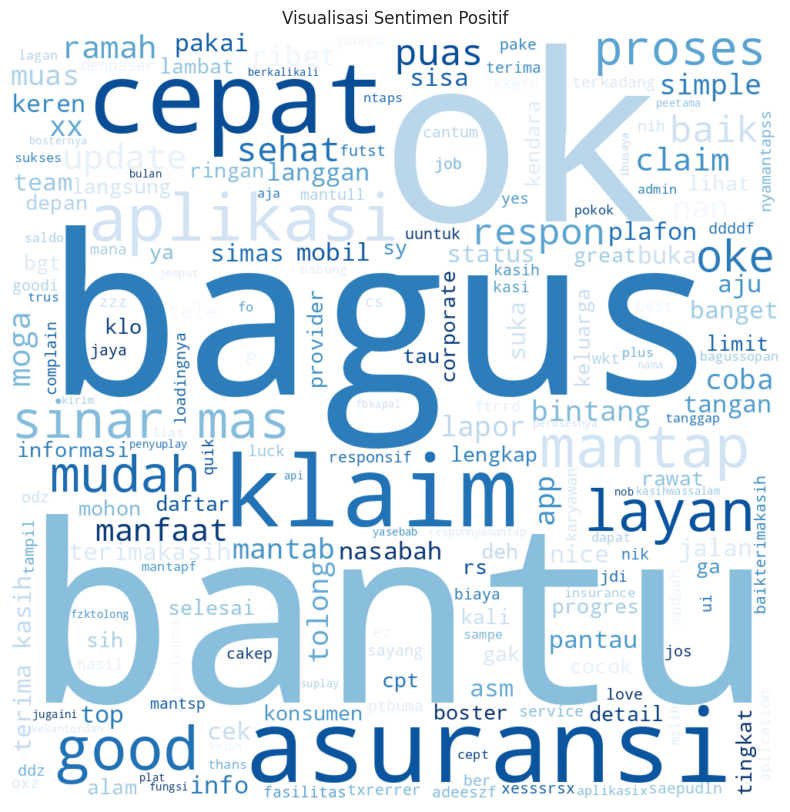

In [181]:
# Polarity == 1 Positif
train_positif = df_preprocessing[df_preprocessing['label'] == 1]
all_text_positif = ' '.join(map(str, [word for word in train_positif['content_join']]))
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(10,10))
plt.title('Visualisasi Sentimen Positif')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

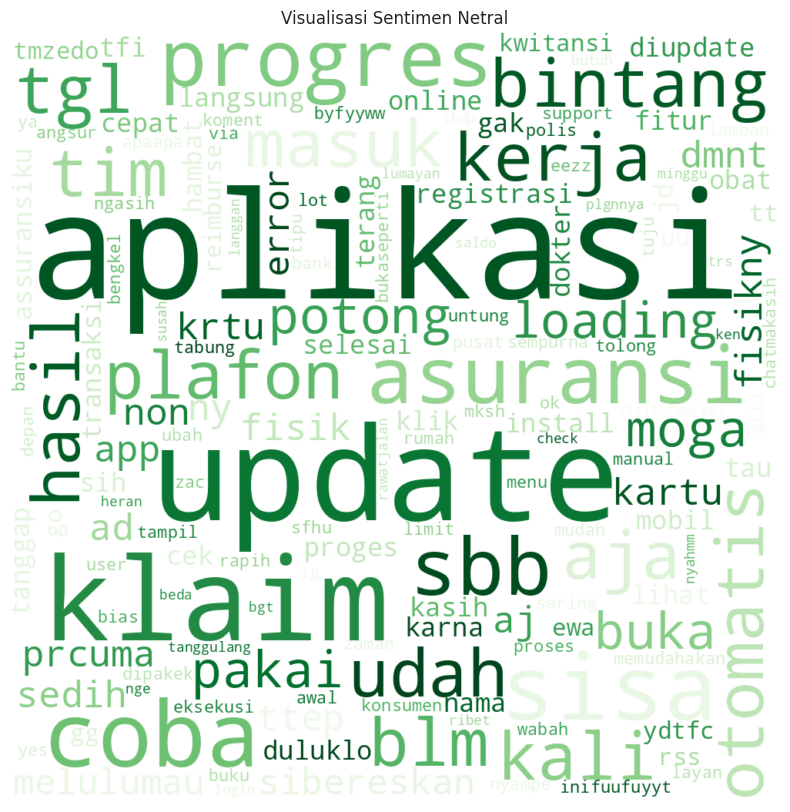

In [182]:
# Polarity == 0 Netral
train_netral = df_preprocessing[df_preprocessing["label"] == 0]
all_text_netral = ' '.join(map(str, [word for word in train_netral["content_join"]]))
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_netral)
plt.figure(figsize=(10,10))
plt.title('Visualisasi Sentimen Netral')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

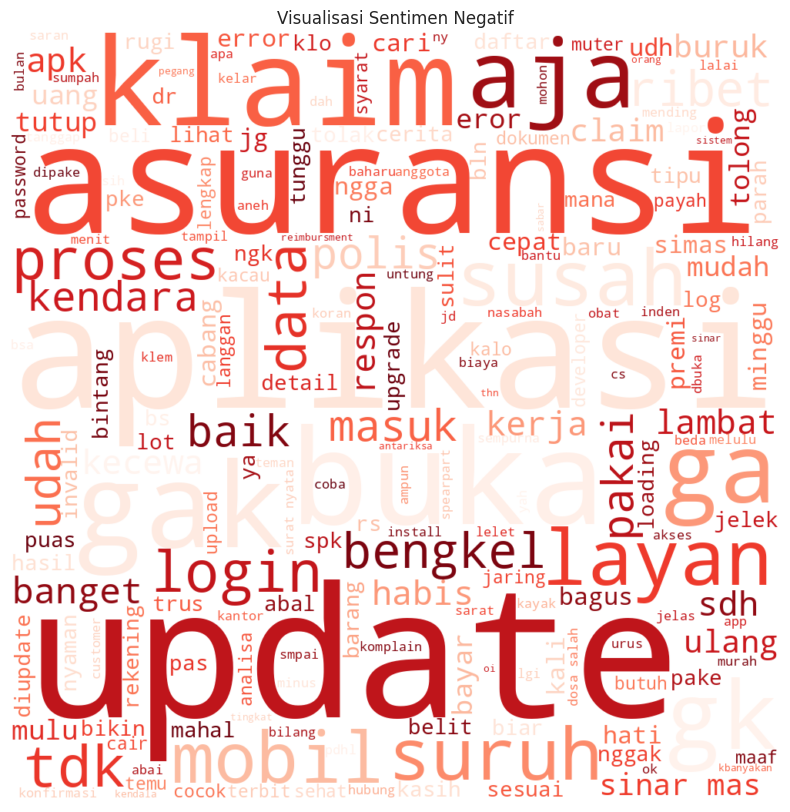

In [183]:
# Polarity == -1 Negatif
train_negatif = df_preprocessing[df_preprocessing["label"] == -1]
all_text_negatif = ' '.join(map(str, [word for word in train_negatif["content_join"]]))
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negatif)
plt.figure(figsize=(10,10))
plt.title('Visualisasi Sentimen Negatif')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [184]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#Shape of the dataset, and breakdown of the classes
print(f"rating 1 = {len(df_preprocessing[df_preprocessing['score']==1])} rows")
print(f"rating 2 = {len(df_preprocessing[df_preprocessing['score']==2])} rows")
print(f"rating 3 = {len(df_preprocessing[df_preprocessing['score']==3])} rows")
print(f"rating 4 = {len(df_preprocessing[df_preprocessing['score']==4])} rows")
print(f"rating 5 = {len(df_preprocessing[df_preprocessing['score']==5])} rows")

# Missing values in the dataset
print(f"Number of null in label: { df_preprocessing['score'].isnull().sum() }")
print(f"Number of null in text: { df_preprocessing['score'].isnull().sum()}")

rating 1 = 159 rows
rating 2 = 22 rows
rating 3 = 34 rows
rating 4 = 25 rows
rating 5 = 239 rows
Number of null in label: 0
Number of null in text: 0


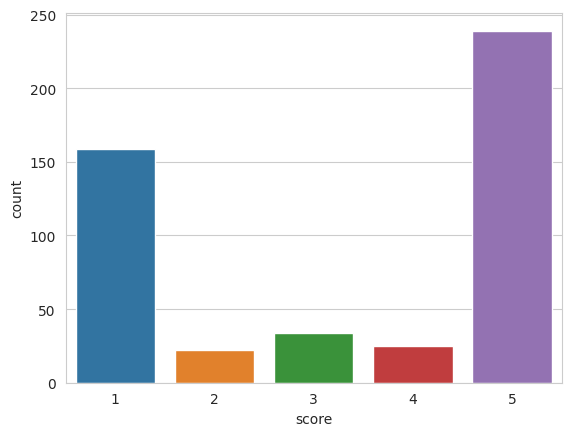

In [185]:
sns.countplot(x='score', data=df_preprocessing);

In [186]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#Shape of the dataset, and breakdown of the classes
print(f"1 = {len(df_preprocessing[df_preprocessing['label']==1])} rows")
print(f"0 = {len(df_preprocessing[df_preprocessing['label']==0])} rows")
print(f"-1 = {len(df_preprocessing[df_preprocessing['label']==-1])} rows")

# Missing values in the dataset
print(f"Number of null in label: { df_preprocessing['label'].isnull().sum() }")
print(f"Number of null in text: { df_preprocessing['label'].isnull().sum()}")

1 = 264 rows
0 = 34 rows
-1 = 181 rows
Number of null in label: 0
Number of null in text: 0


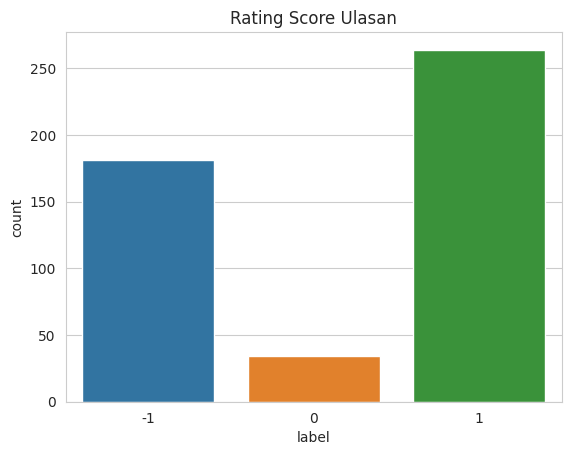

In [187]:
plt.title('Rating Score Ulasan')
sns.countplot(x='label', data=df_preprocessing);

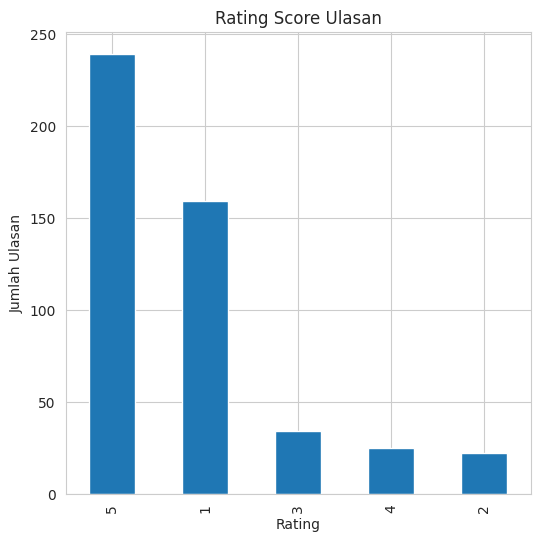

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

data = df_preprocessing['score'].value_counts()

# Membuat plot bar chart
plt.figure(figsize=(6, 6))
data.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.title('Rating Score Ulasan')

# Menampilkan plot
plt.show()

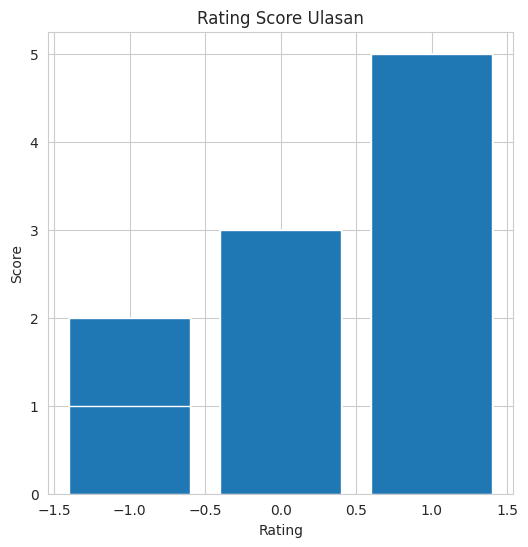

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat plot bar chart
plt.figure(figsize=(6, 6))

plt.axes().bar(df_preprocessing['label'], df_preprocessing['score'])

plt.xlabel('Rating')
plt.ylabel('Score')
plt.title('Rating Score Ulasan')

# Menampilkan plot
plt.show()

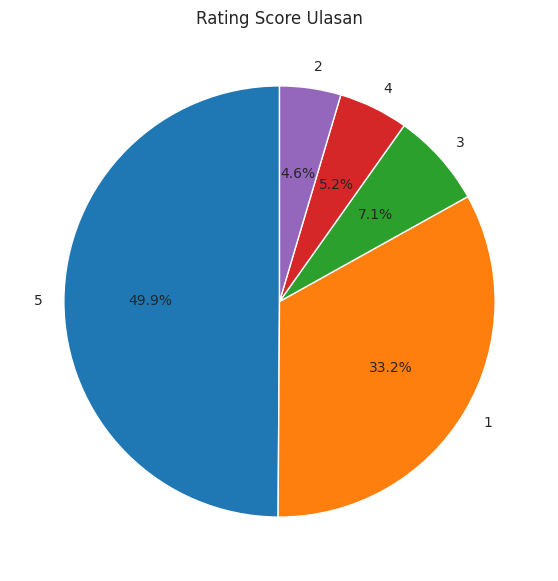

In [190]:
import matplotlib.pyplot as plt

data = df_preprocessing['score'].value_counts()
explode = [0, 0, 0, 0, 0]

# Membuat plot pie chart
plt.figure(figsize=(7, 7))
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, label='')

# Menampilkan plot
plt.title('Rating Score Ulasan')
plt.show()

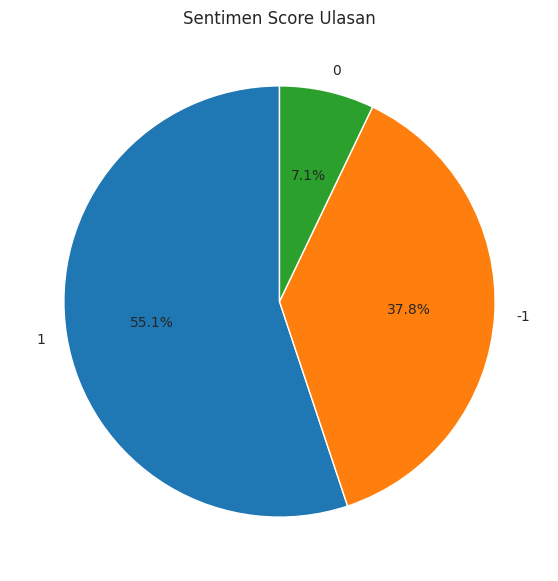

In [191]:
import matplotlib.pyplot as plt

data = df_preprocessing['label'].value_counts()
explode = [0, 0, 0]

# Membuat plot pie chart
plt.figure(figsize=(7, 7))
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, label='')

# Menampilkan plot
plt.title('Sentimen Score Ulasan')
plt.show()

In [192]:
df_preprocessing.to_csv(path+"Pelabelan_Text.csv", index=None, header=True)

# TF-IDF

sumber : https://www.youtube.com/watch?v=f0a1XXmaQp8&ab_channel=IndonesiaBelajar

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer()
text_tf = vectorizer.fit_transform(df_preprocessing['content_join'].astype('U'))
print(text_tf)

  (0, 785)	0.8460054218135558
  (0, 63)	0.5331742925742646
  (1, 105)	0.37987512993516936
  (1, 464)	0.46373533816898005
  (1, 663)	0.4946856458873815
  (1, 741)	0.4946856458873815
  (1, 363)	0.3888658448565629
  (2, 67)	1.0
  (3, 573)	0.4266792288871552
  (3, 380)	0.3276521743892396
  (3, 772)	0.298562317622109
  (3, 186)	0.3999837839295425
  (3, 38)	0.4266792288871552
  (3, 828)	0.381043064304465
  (3, 456)	0.3663515007823934
  (4, 228)	0.572259099453513
  (4, 374)	0.6890721369274293
  (4, 867)	0.3310349494398962
  (4, 45)	0.2968416673114569
  (5, 530)	0.40749136778763184
  (5, 323)	0.40749136778763184
  (5, 851)	0.3881951361477401
  (5, 688)	0.4346878787876709
  (5, 581)	0.4346878787876709
  (5, 158)	0.37322781608357875
  :	:
  (472, 472)	0.33313293637596847
  (472, 144)	0.34295579159647127
  (472, 391)	0.20784745624080708
  (472, 709)	0.3171185714273797
  (472, 45)	0.1778976849626958
  (473, 720)	0.6622219456644823
  (473, 788)	0.5685910801844593
  (473, 792)	0.4880228255061612
  (

In [194]:
vectorizer.get_feature_names_out()

array(['abai', 'abal', 'abdet', 'abis', 'acc', 'accyg', 'ad', 'adeeszf',
       'admin', 'administrasi', 'aj', 'aja', 'ajak', 'ajamndng', 'ajar',
       'aju', 'akhirat', 'akses', 'aktif', 'alam', 'alamat', 'alas',
       'alesan', 'alfa', 'alfiansyah', 'alias', 'ambil', 'amburadul',
       'ampun', 'an', 'ana', 'anak', 'analisa', 'analisis', 'aneh',
       'anggota', 'angsur', 'anjg', 'antariksa', 'apa', 'apaapa', 'api',
       'apk', 'apknya', 'aplication', 'aplikasi', 'aplikasikacau',
       'aplikasike', 'aplikasix', 'app', 'apps', 'area', 'asetelah',
       'asm', 'asosiasi', 'assu', 'assuransiku', 'asuransi', 'asuransiny',
       'asuransisinarmaspalingok', 'awal', 'awesome', 'az', 'bagus',
       'bagussopan', 'bah', 'baharu', 'baik', 'baikterimakasih',
       'bakalanhati', 'bandung', 'banget', 'bangetproses', 'bank',
       'bantu', 'barang', 'baret', 'baru', 'bawa', 'bayar', 'beban',
       'beda', 'begituu', 'beli', 'belit', 'bener', 'bengkel', 'bentar',
       'ber', 'berbe

In [195]:
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
print(text_tf.todense().shape)

(479, 906)


In [197]:
import pandas as pd

df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names_out(),
                  columns=[f'D{i+1}' for i in range(len(df_preprocessing['content_join']))])
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D470,D471,D472,D473,D474,D475,D476,D477,D478,D479
abai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abdet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zainudin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zaman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PEMBAGIAN DATA TRAINING DAN DATA TESTING
80:20

In [198]:
# SPLITING DATA coba k fold close validation
from sklearn.model_selection import train_test_split

x = text_tf
y = df_preprocessing['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(383, 906)
(96, 906)
(383,)
(96,)


In [199]:
#OVERSAMPLING
print("Before Positif : {}" .format(sum(y_train == 1)))
print("Before Negatif : {}" .format(sum(y_train == -1)))
print("Before Netral  : {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After x_train : {}".format(x_train_res.shape))
print("After y_train : {} \n".format(y_train_res.shape))

print("After Positif : {}".format(sum(y_train_res == 1)))
print("After Negatif : {}".format(sum(y_train_res == -1)))
print("After Netral  : {}".format(sum(y_train_res == 0)))

Before Positif : 204
Before Negatif : 148
Before Netral  : 31 

After x_train : (612, 906)
After y_train : (612,) 

After Positif : 204
After Negatif : 204
After Netral  : 204


# IMPLEMENTASI METODE SVM

In [200]:
from sklearn import svm

elf = svm.SVC(kernel='linear').fit(x_train_res, y_train_res)
predicted = elf.predict(x_test)
print("SVM Accuracy ", accuracy_score(y_test, predicted))
print("SVM Precision ", precision_score(y_test, predicted, average="macro", pos_label="-1"))
print("SVM Recall ", recall_score(y_test, predicted, average="macro", pos_label="-1"))
print("SVM f1_Score ", f1_score(y_test, predicted, average="macro", pos_label="-1"))

print(f'confusion Matrix : \n {confusion_matrix(y_test, predicted)}')

print(classification_report(y_test, predicted, zero_division=0))

SVM Accuracy  0.78125
SVM Precision  0.5392817059483725
SVM Recall  0.5166666666666666
SVM f1_Score  0.5248677248677248
confusion Matrix : 
 [[22  0 11]
 [ 1  0  2]
 [ 4  3 53]]
              precision    recall  f1-score   support

          -1       0.81      0.67      0.73        33
           0       0.00      0.00      0.00         3
           1       0.80      0.88      0.84        60

    accuracy                           0.78        96
   macro avg       0.54      0.52      0.52        96
weighted avg       0.78      0.78      0.78        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '-1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '-1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '-1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# PENGUKURAN KINERJA

# TF-IDF
Irwansight

In [79]:
y = score

NameError: ignored

In [74]:
# Handling imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 1)
x_sm, y_sm = smote.fit_resample(X_tfidf,y)

NameError: ignored

In [ ]:
from sklearn import model_selection
Train_X, Test_X, Train_Y, Test_Y =model_selection.train_test_split(x_sm, y_sm, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
svm = SVC()
svm.fit(Train_X, Train_Y)
Pred_Y = svm.predict(Test_X)

In [ ]:
f1_score(Test_Y, Pred_Y, average='macro')

In [ ]:
f1_score(Test_Y, Pred_Y, average='micro')

In [81]:
f1_score(Test_Y, Pred_Y, average='weighted')

NameError: ignored

In [80]:
f1_score(Test_Y, Pred_Y, average=None)

NameError: ignored